In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/luispmorera/CoderHouse01/main/Stats%20survey.csv'
df = pd.read_csv(url)
df

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,3-5,3,1-3,0,0,No,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,Yes,Close


In [3]:
#LA BASE DE DATOS CONSISTE EN UNA ENCUESTA A ESTUDIANTES SOBRE SU CONSUMO DE ALCOHOL Y OTRAS VARIABLES DEMOGRÁFICAS.
#LA HIPOTESIS CONSISTE EN EVALUAR SI EL CONSUMO DEL ALCOHOL AFEFCTA EL RENIDMIENTO ACADÉMICO. LA CONFIRMACIÓN O DESCARTE DE LA
#HIPOTESIS SE REALIZARÁ A TRAVÉS DE CORRELACIONES BIVARIADAS Y REGRESIONES LINEALES EN UNA SEGUNDA ETAPA DEL PROYECTO
#EN ESTA PRIMERA ETAPA SE REALIZARÁN GRÁFICOS DESCRIPTIVOS EXPLORATIVOS DE LA BASE.

In [4]:
from IPython.display import Image, display

url = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F19333363%2F0343dcc8ef6a299793ac9c2ac765346c%2Fbeg.jpg?generation=1711370517515575&alt=media"

display(Image(url=url))





In [5]:
df.columns



Index(['Timestamp', 'Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)',
       'What year were you in last year (2023) ?',
       'What faculty does your degree fall under?',
       'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
       'Your Accommodation Status Last Year (2023)',
       'Monthly Allowance in 2023', 'Were you on scholarship/bursary in 2023?',
       'Additional amount of studying (in hrs) per week',
       'How often do you go out partying/socialising during the week? ',
       'On a night out, how many alcoholic drinks do you consume?',
       'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
       'How many modules have you failed thus far into your studies?',
       'Are you currently in a romantic relationship?',
       'Do your parents approve alcohol consumption?',
       'How strong is your relationship with your parent/s?'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

In [7]:
df.shape

(406, 17)

In [8]:
df.isna().sum()

Timestamp                                                                                             0
Your Sex?                                                                                             2
Your Matric (grade 12) Average/ GPA (in %)                                                            7
What year were you in last year (2023) ?                                                             73
What faculty does your degree fall under?                                                             7
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   86
Your Accommodation Status Last Year (2023)                                                           23
Monthly Allowance in 2023                                                                            31
Were you on scholarship/bursary in 2023?                                                              8
Additional amount of studying (in hrs) per week                 

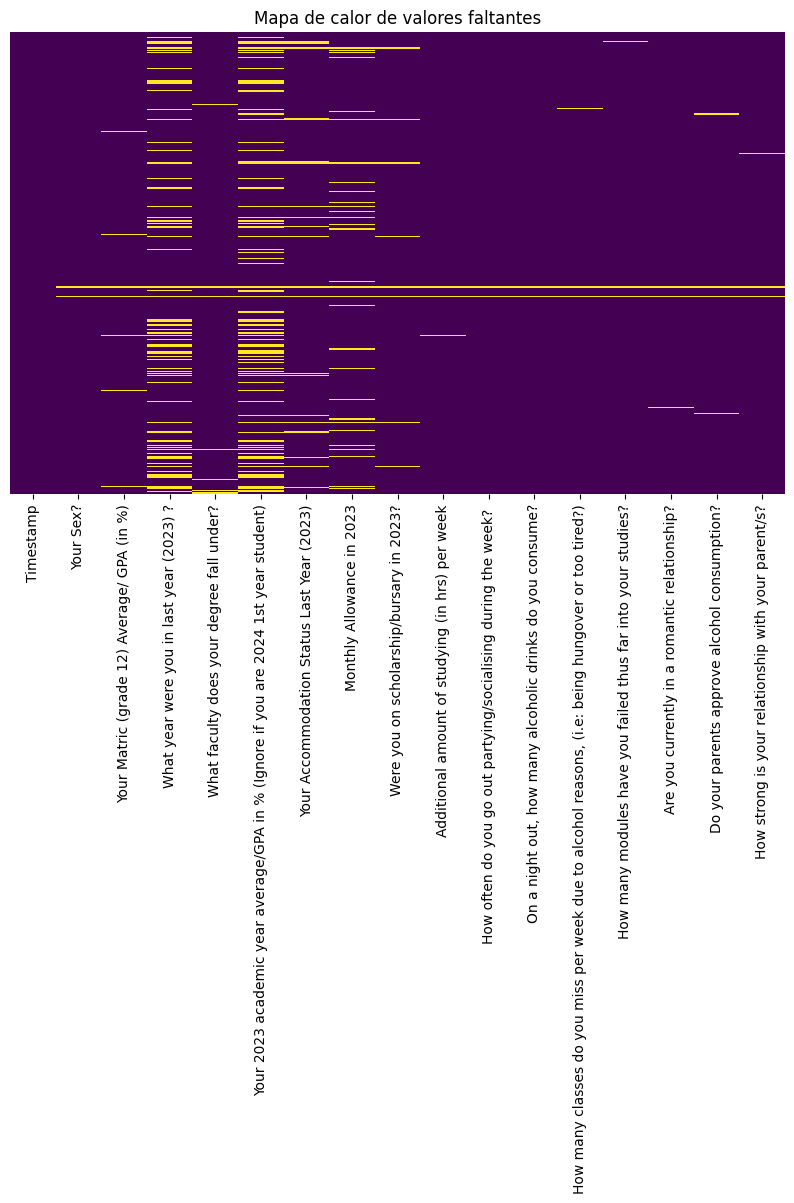

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [10]:
df.describe()

,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


In [11]:
df['Your Sex?'] = df['Your Sex?'].astype('category')
df['What year were you in last year (2023) ?'] = df['What year were you in last year (2023) ?'].astype('category')
df['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'] = df['How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)'].astype('category')
df['Monthly Allowance in 2023'] = df['Monthly Allowance in 2023'].astype('category')
df['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'] = df['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].astype('float64')


In [12]:
descripcion_categoricas = df.describe(include=['category'])
descripcion_categoricas


,Your Sex?,What year were you in last year (2023) ?,Monthly Allowance in 2023,"How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)"
count,404,333,375,403
unique,2,5,5,5
top,Male,2nd Year,R 4001- R 5000,0
freq,216,153,159,214


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype   
---  ------                                                                                             --------------  -----   
 0   Timestamp                                                                                          406 non-null    object  
 1   Your Sex?                                                                                          404 non-null    category
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64 
 3   What year were you in last year (2023) ?                                                           333 non-null    category
 4   What faculty does your degree fall under?                                                          399 non-null    o

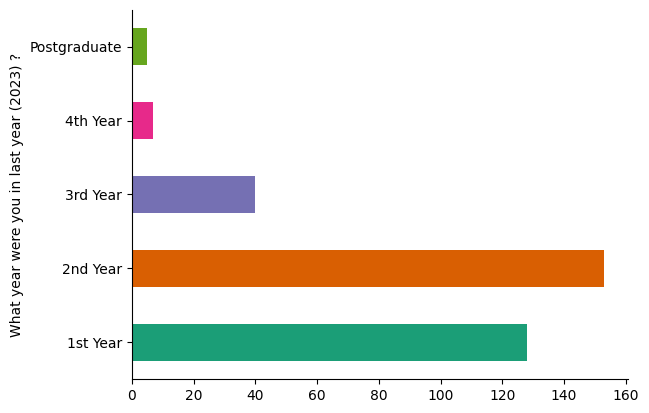

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('What year were you in last year (2023) ?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

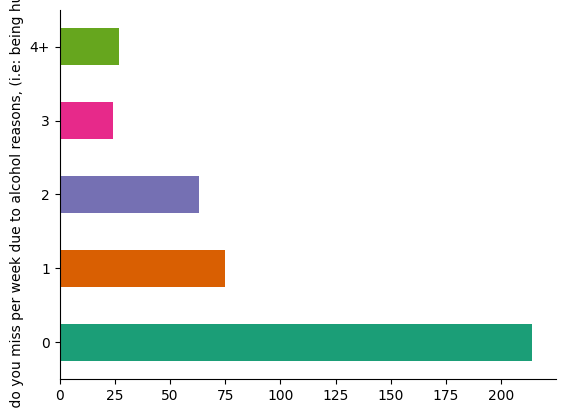

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


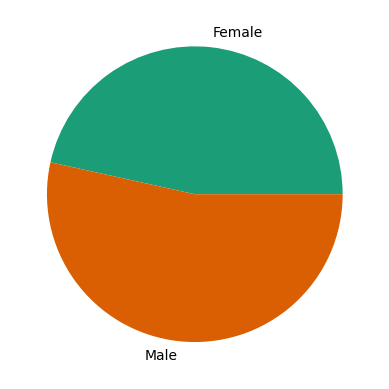

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Your Sex?').size().plot(kind='pie', colors=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

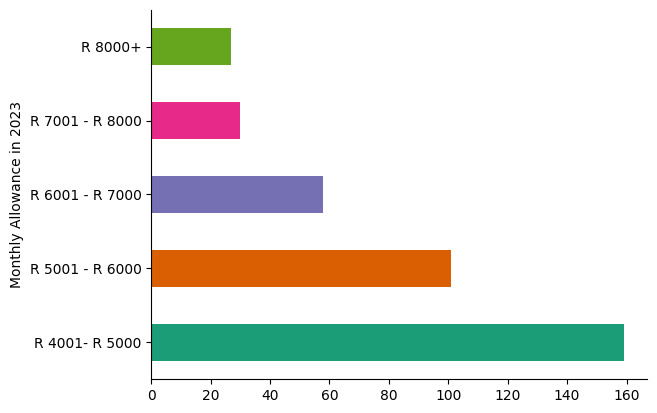

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Monthly Allowance in 2023').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-26-26e2af62668c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Monthly Allowance in 2023', data=df, palette='Dark2')


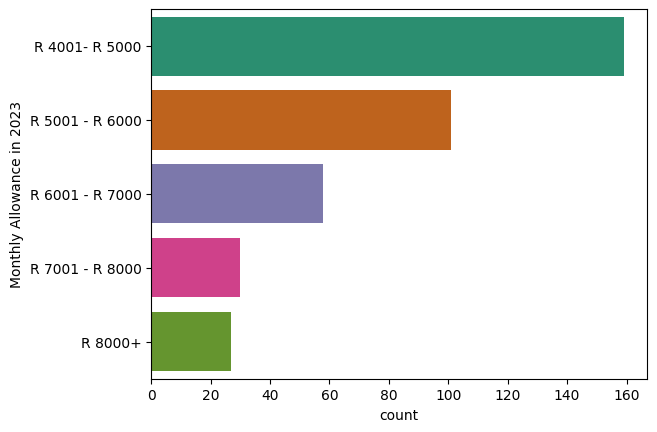

In [26]:
#gráfico usando seaborn
sns.countplot(y='Monthly Allowance in 2023', data=df, palette='Dark2')
plt.show()

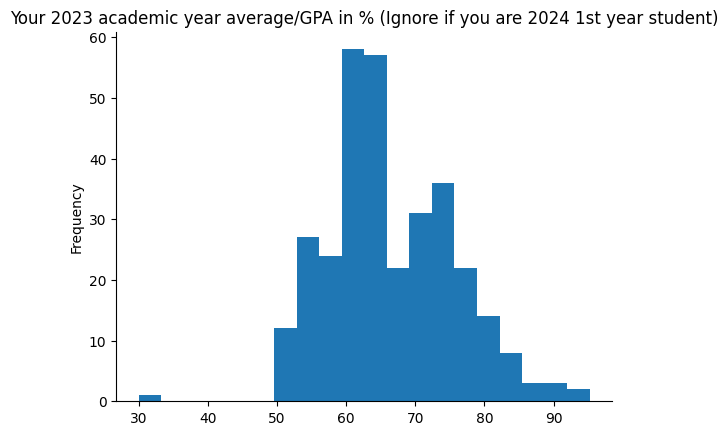

In [18]:
from matplotlib import pyplot as plt
df['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].plot(kind='hist', bins=20, title='Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)')
plt.gca().spines[['top', 'right',]].set_visible(False)

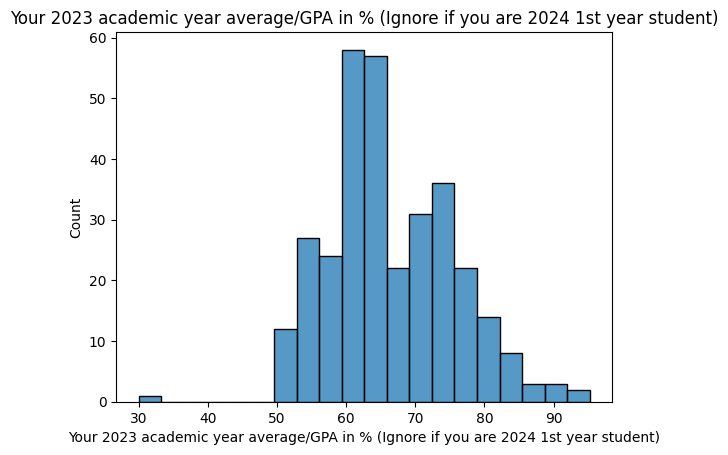

In [27]:
sns.histplot(data=df, x='Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', bins=20)
plt.title('Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)')
plt.show()

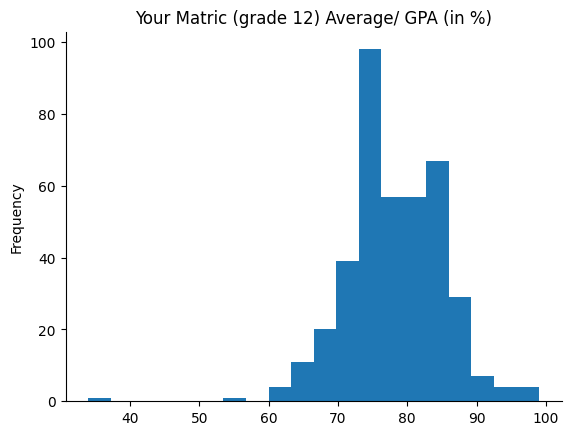

In [19]:
from matplotlib import pyplot as plt
df['Your Matric (grade 12) Average/ GPA (in %)'].plot(kind='hist', bins=20, title='Your Matric (grade 12) Average/ GPA (in %)')
plt.gca().spines[['top', 'right',]].set_visible(False)

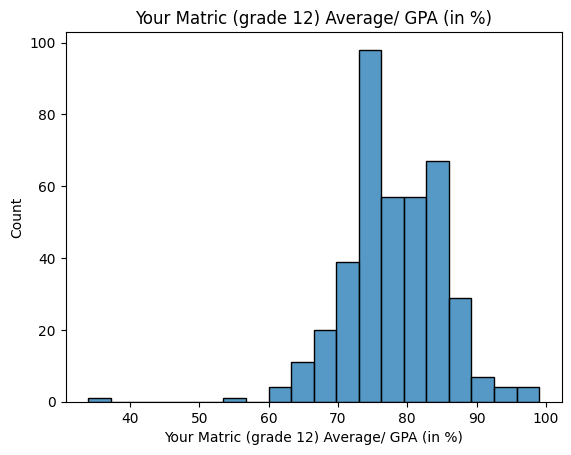

In [28]:
sns.histplot(data=df, x='Your Matric (grade 12) Average/ GPA (in %)', bins=20)
plt.title('Your Matric (grade 12) Average/ GPA (in %)')
plt.show()